In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
%matplotlib inline

# Load  Data

In [2]:
data = pd.read_csv('Crop_recommendation.csv')
X = data.drop('label' ,axis =1)
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [3]:
y = data['label']
y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

In [4]:
model = []
accuracy = []

# Model Training

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train , y_train)
DecisionTreeClassifier()
predict = DT.predict(X_test)
DT_accuracy = DT.score(X_test,y_test)

In [6]:
DT_accuracy

0.9818181818181818

In [7]:
accuracy.append(DT_accuracy)
model.append('Decision Tree')

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
clf.score(X_test,y_test)

0.9863636363636363

# Evaluation

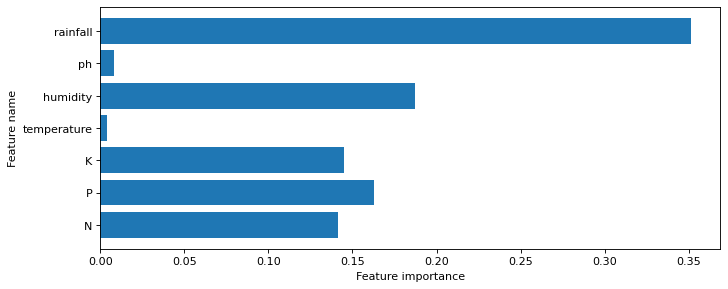

In [9]:
#Let's visualize the import features which are taken into consideration by decision trees.
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), clf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

In [10]:
accuracy = accuracy_score(y_test, predict)

precision = precision_score(y_test, predict, average="micro")
precision_each_class = precision_score(y_test, predict, average=None)

recall = recall_score(y_test, predict, average="micro")
recall_each_class = recall_score(y_test, predict, average=None)

print("accuracy_score : " + str(accuracy))
print("precision_score : " + str(precision))
print("precision_score for each class: " + str(precision_each_class))
print("recall_score : " + str(recall))
print("recall_score for each class: " + str(recall_each_class))

accuracy_score : 0.9818181818181818
precision_score : 0.9818181818181818
precision_score for each class: [1.         1.         0.95238095 1.         1.         1.
 1.         1.         0.90909091 1.         0.91666667 1.
 1.         1.         1.         1.         0.93333333 1.
 1.         1.         0.85       1.        ]
recall_score : 0.9818181818181818
recall_score for each class: [1.         1.         1.         1.         1.         1.
 1.         1.         0.86956522 1.         1.         0.95238095
 1.         0.91666667 1.         1.         1.         1.
 1.         1.         0.89473684 1.        ]


In [11]:
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class = "ovo")

In [12]:
roc_auc

0.9933406238162693

In [13]:
# Calculate the accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, predict)
confusion_mat = confusion_matrix(y_test, predict)
classification_rep = classification_report(y_test, predict)

In [14]:
#checking the accuracy of the model
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9818181818181818
Confusion Matrix:
 [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0 22  0  0  0  0

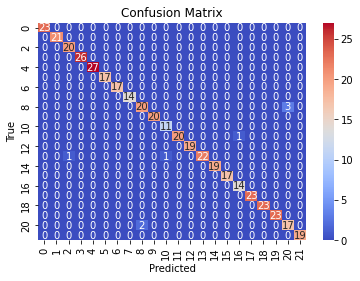

In [15]:
#Create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Saving Model for Testing

##### Pickle approach

In [16]:
import pickle

In [17]:
# Save the Model to file in the current working directory

Pkl_Filename = "Pickle_DecisionTree_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(DT, file)

In [18]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickle_DecisionTree_Model = pickle.load(file)

Pickle_DecisionTree_Model

DecisionTreeClassifier()

In [19]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickle_DecisionTree_Model.score(X_test, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickle_DecisionTree_Model.predict(X_test)  

Ypredict

Test score: 98.18 %


array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
       'pomegranate', 'mothbeans', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'blackgram',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya',
       'pigeonpeas', 'orange', 'rice', 'muskmelon', 'pigeonpeas',
       'muskmelon', 'coconut', 'jute', 'banana', 'blackgram', 'papaya',
       'banana', 'cotton', 'watermelon', 'orange', 'coffee', 'chickp